In [30]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import operator
import itertools
import json
from sklearn import metrics

In [31]:
# Meta statistics
sl_set = []
OOV_count_set = []
vocab_count_set = []
sl_stats_set = []

datasets = ["unaligned.en", "unaligned.fr", "train.en", "train.fr"]

In [36]:
# start = time.perf_counter()
for path in datasets:
    bow = []
    sentence_length = []
    vocab_alpha = {}
    OOV = {}
    real_vocab = {}
    with open("processed/" + path, "r") as text_file:
        for line in text_file:
            stripped_line = line.strip()
            bow.extend(stripped_line.split())
            sentence_length.append(len(stripped_line.split()))
    # Word Count + Dictionary    
#     print("Word Count Total: ", sum(sentence_length))
    vocab = pd.DataFrame(list(zip(bow, bow, [1] * len(bow))), columns =['Word', 'Token','Count']).groupby('Word',sort=False)['Token'].count().to_dict()
    for word, count in vocab.items():
        if any(c.isalpha() for c in word):
            vocab_alpha[word] = count
        else:
            OOV[word] = count
    real_vocab = vocab_alpha.copy()
#     real_vocab['num'] = sum(OOV.values()) # Could be removed
    real_vocab = {k: v / total for total in (sum(real_vocab.values(), 0.0),) for k, v in real_vocab.items()}
    real_vocab = {k: v for k, v in sorted(real_vocab.items(), key=lambda item: item[1], reverse=True)}
    with open( path +'.json', 'w') as fp:
        json.dump(real_vocab, fp)
#     print("Total Vocab Size by Words: ", len(vocab))
#     print("OOV Size: ", len(OOV))
#     print("Net Vocab Size: ", len(vocab_alpha))

    # Word Frequency
    wf = np.asarray(list(vocab_alpha.values()))
    wf_metrics = {"min": np.amin(wf), "max": np.amax(wf), "mean": np.mean(wf), "std": np.std(wf)}
#     print("Word Frequency Info: ", wf_metrics)

    # Most Frequent Words
    sorted_vocab = dict(sorted(vocab_alpha.items(), key=operator.itemgetter(1),reverse=True))
    top = dict(itertools.islice(sorted_vocab.items(), 20))
#     print("Most Common Words: ", top)

    # Sentence Lengths
    sl = np.asarray(sentence_length)
    sentence_len_metrics = {"min": np.amin(sl), "max": np.amax(sl), "mean": np.mean(sl), "std": np.std(sl)}
#     print("Sentence Length Info: ",sentence_len_metrics)

    # Append to metadata
    sl_set.append(sl)
    OOV_count_set.append(len(OOV))
    vocab_count_set.append(len(vocab_alpha))
    

In [37]:
with open('unaligned.en.json') as f:
    uni_en = json.load(f)
with open('unaligned.fr.json') as f:
    uni_fr = json.load(f)
with open('train.en.json') as f:
    train_en = json.load(f)
with open('train.fr.json') as f:
    train_fr = json.load(f)

In [38]:
train_en_pd = pd.DataFrame.from_dict(train_en, orient='index', columns=['parallel']).reset_index().rename(columns={"index": "word"})
train_fr_pd = pd.DataFrame.from_dict(train_fr, orient='index', columns=['parallel']).reset_index().rename(columns={"index": "word"})
uni_en_pd = pd.DataFrame.from_dict(uni_en, orient='index', columns=['mono']).reset_index().rename(columns={"index": "word"})
uni_fr_pd = pd.DataFrame.from_dict(uni_fr, orient='index', columns=['mono']).reset_index().rename(columns={"index": "word"})
english = train_en_pd.merge(uni_en_pd, on='word', how='left').set_index('word')
french = train_fr_pd.merge(uni_fr_pd, on='word', how='left').set_index('word')

In [52]:
import matplotlib.pyplot as plt
corr_en = english[0:100].transpose().corr()
corr_en.style.background_gradient(cmap='coolwarm')

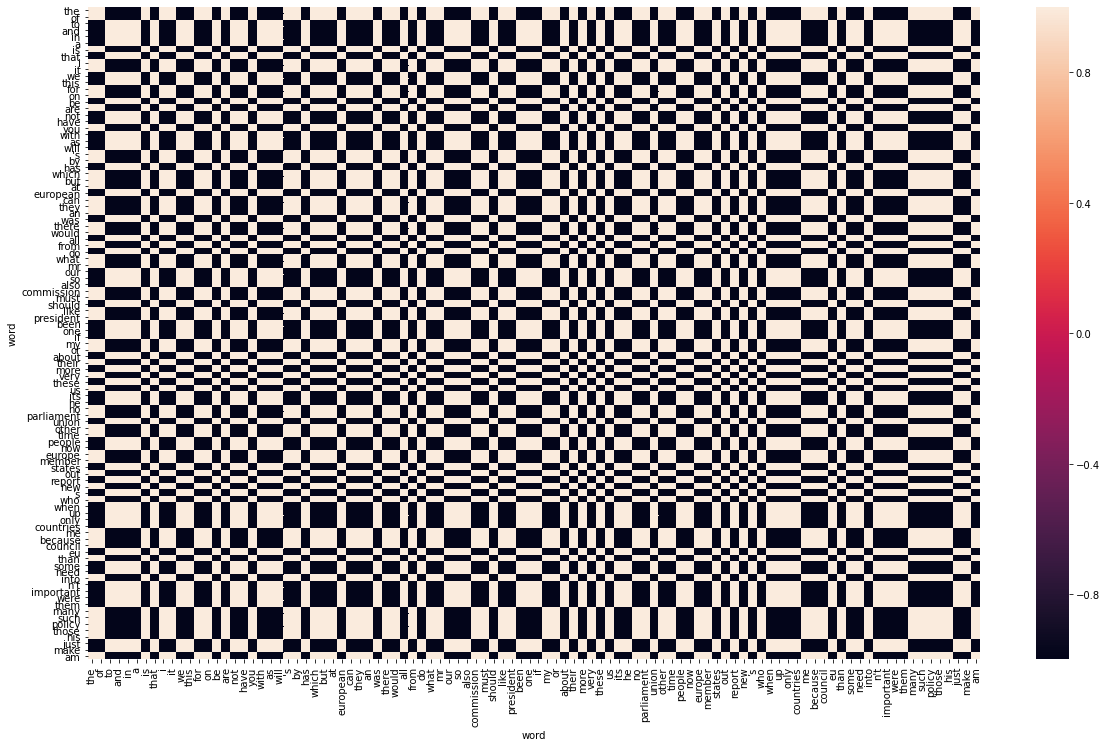

In [53]:
plt.figure(figsize=[20,12])
sns.heatmap(corr_en, 
        xticklabels=corr_en.columns,
        yticklabels=corr_en.columns)
plt.show()

In [54]:
corr_en = english.corr()
corr_en.style.background_gradient(cmap='coolwarm')

In [55]:
corr_fr = french[0:100].transpose().corr()
corr_fr.style.background_gradient(cmap='coolwarm')

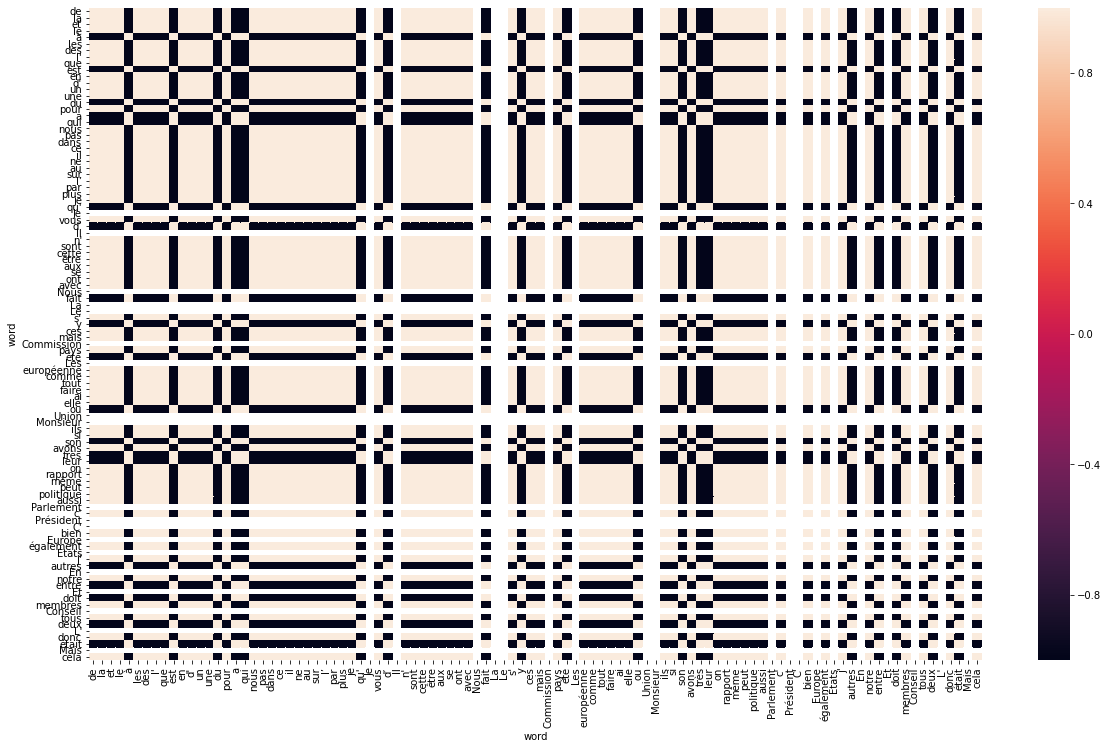

In [56]:
plt.figure(figsize=[20,12])
sns.heatmap(corr_fr, 
        xticklabels=corr_fr.columns,
        yticklabels=corr_fr.columns)
plt.show()

In [57]:
corr_fr = french.corr()
corr_fr.style.background_gradient(cmap='coolwarm')

In [116]:
# plt.figure(figsize=[10,8])
# plt.hist(sl, bins=50)
# plt.title("Monolingual English, Sentence Length Distribution")
# plt.ylabel('Number of Sentences',fontsize=10)
# plt.xlabel('Sentence Length',fontsize=10)
# plt.show()

In [117]:
# plt.figure(figsize=[20,12])
# plt.bar(top.keys(), top.values())
# plt.show()

In [ ]:
# plt.figure(figsize=[10,8])
# plt.hist(sl, bins=50)
# plt.title("Monolingual French, Sentence Length Distribution")
# plt.ylabel('Number of Sentences',fontsize=10)
# plt.xlabel('Sentence Length',fontsize=10)
# plt.show()

In [ ]:
# plt.figure(figsize=[20,12])
# plt.bar(top.keys(), top.values())
# plt.show()

In [ ]:
# plt.figure(figsize=[10,8])
# plt.hist(sl, bins=50)
# plt.title("Parallel English, Sentence Length Distribution")
# plt.ylabel('Number of Sentences',fontsize=10)
# plt.xlabel('Sentence Length',fontsize=10)
# plt.show()

In [ ]:
# plt.figure(figsize=[20,12])
# plt.bar(top.keys(), top.values())
# plt.show()

In [ ]:
# plt.figure(figsize=[10,8])
# plt.hist(sl, bins=50)
# plt.title("Parallel French, Sentence Length Distribution")
# plt.ylabel('Number of Sentences',fontsize=10)
# plt.xlabel('Sentence Length',fontsize=10)
# plt.show()

In [ ]:
# plt.figure(figsize=[20,12])
# plt.bar(top.keys(), top.values())
# plt.show()

In [ ]:
# # Sentence Lengths
# plt.figure(figsize=[10,8])
# sns.boxplot(data = sl_set)
# plt.show()

In [ ]:
# # OOVs in relation to real vocab
# groups = ['Unaligned FR', 'Unalgined EN', 'Parallel FR', 'Parallel EN']
# oovs = np.asarray(OOV_count_set)
# reals = np.asarray(vocab_count_set)
# ind = [x for x, _ in enumerate(groups)]

# plt.bar(ind, oovs, width=0.8, label='silvers', color='grey', bottom=reals)
# plt.bar(ind, reals, width=0.8, label='bronzes', color='blue')

# plt.xticks(ind, groups)
# plt.ylabel("Vocab Size")
# plt.xlabel("Groups")
# plt.legend(loc="upper right")
# plt.title("OOVs vs Vocab")

# plt.show()